In [34]:
import os
import random
import sys


## Package
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow
py.init_notebook_mode(connected=True)


## Keras
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical


## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm



In [35]:
# Data Directory
# Please edit according to your directory change.
dir_list = os.listdir('C:\\Users\\USER\\Desktop\\FYP\\Datasets\\RAVDESS')
dir_list.sort()
print (dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [36]:
# Creating DataFrame 
data_df = pd.DataFrame(columns=['path', 'source', 'actor', 'gender',
                                'intensity', 'statement', 'repetition', 'emotion'])
count = 0
for i in dir_list:
    file_list = os.listdir('C:\\Users\\USER\\Desktop\\FYP\\Datasets\\RAVDESS\\' + i)
    for f in file_list:
        nm = f.split('.')[0].split('-')
        path = 'C:\\Users\\USER\\Desktop\\FYP\\Datasets\\RAVDESS\\' + i + '\\' + f
        src = int(nm[1])
        actor = int(nm[-1])
        emotion = int(nm[2])
        
        if int(actor)%2 == 0:
            gender = "female"
        else:
            gender = "male"
        
        if nm[3] == '01':
            intensity = 0
        else:
            intensity = 1
        
        if nm[4] == '01':
            statement = 0
        else:
            statement = 1
        
        if nm[5] == '01':
            repeat = 0
        else:
            repeat = 1
            
        data_df.loc[count] = [path, src, actor, gender, intensity, statement, repeat, emotion]
        count += 1

In [37]:
print (len(data_df))
pd.set_option("display.max_rows", None, "display.max_columns", None)
data_df

1439


,path,source,actor,gender,intensity,statement,repetition,emotion
0,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,0,0,1
1,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,0,1,1
2,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,1,0,1
3,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,1,1,1
4,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,0,0,2
5,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,0,1,2
6,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,1,0,2
7,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,1,1,2
8,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,1,0,0,2
9,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,1,0,1,2


In [38]:
# Dividing emotions into 5 classes: neutral, disgust, sad, angry and fearful.
label5_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1:
        lb = "_neutral"
    elif data_df.emotion[i] == 7:
        lb = "_disgust"
    elif data_df.emotion[i] == 4:
        lb = "_sad"
    elif data_df.emotion[i] == 5:
        lb = "_angry"
    elif data_df.emotion[i] == 6:
        lb = "_fearful"    
    else:
        lb = "_none"
    
    # Add gender to the label  
    label5_list.append(data_df.gender[i] + lb)
    
len(label5_list)

1439

In [39]:
data_df['label'] = label5_list
data_df.head()

,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,0,0,1,male_neutral
1,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,0,1,1,male_neutral
2,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,1,0,1,male_neutral
3,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,1,1,1,male_neutral
4,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,0,0,2,male_none


In [40]:
print (data_df.label.value_counts().keys())

Index(['male_none', 'female_none', 'male_sad', 'male_angry', 'male_fearful',
       'male_disgust', 'female_sad', 'female_angry', 'female_disgust',
       'female_fearful', 'male_neutral', 'female_neutral'],
      dtype='object')


In [41]:
# Plotting the emotion distribution

def plot_emotion_dist(dist, color_code='#C2185B', title="Plot"):
    """
    To plot the data distributioin by class.
    Arg:
      dist: pandas series of label count. 
    """
    tmp_df = pd.DataFrame()
    tmp_df['Emotion'] = list(dist.keys())
    tmp_df['Count'] = list(dist)
    fig, ax = plt.subplots(figsize=(14, 7))
    ax = sns.barplot(x="Emotion", y='Count', color=color_code, data=tmp_df)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

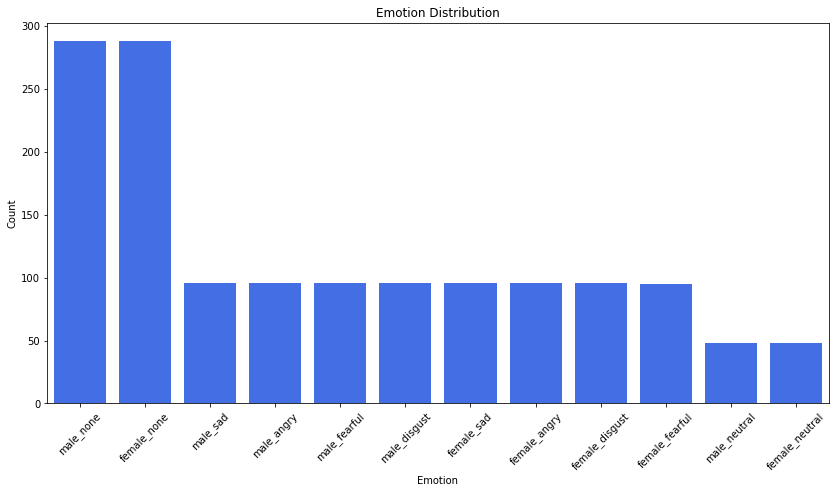

In [42]:
a = data_df.label.value_counts()
plot_emotion_dist(a, "#2962FF", "Emotion Distribution")

In [43]:
# Male Data Set

data2_df = data_df.copy()
data2_df = data2_df[data2_df.label != "male_none"]
data2_df = data2_df[data2_df.label != "female_none"].reset_index(drop=True)
data2_df = data2_df[data2_df.label != "female_neutral"]
data2_df = data2_df[data2_df.label != "female_happy"]
data2_df = data2_df[data2_df.label != "female_angry"]
data2_df = data2_df[data2_df.label != "female_sad"]
data2_df = data2_df[data2_df.label != "female_fearful"]
data2_df = data2_df[data2_df.label != "female_calm"]
data2_df = data2_df[data2_df.label != "female_disgust"]


tmp1 = data2_df[data2_df.actor == 21]
tmp2 = data2_df[data2_df.actor == 22]
tmp3 = data2_df[data2_df.actor == 23]
tmp4 = data2_df[data2_df.actor == 24]
data3_df = pd.concat([tmp1, tmp3],ignore_index=True).reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 21]
data2_df = data2_df[data2_df.actor != 22]
data2_df = data2_df[data2_df.actor != 23].reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 24].reset_index(drop=True)
print (len(data2_df))
data2_df.head(50)

360


,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,0,0,1,male_neutral
1,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,0,1,1,male_neutral
2,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,1,0,1,male_neutral
3,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,1,1,1,male_neutral
4,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,0,0,4,male_sad
5,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,0,1,4,male_sad
6,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,1,0,4,male_sad
7,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,0,1,1,4,male_sad
8,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,1,0,0,4,male_sad
9,C:\Users\USER\Desktop\FYP\Datasets\RAVDESS\Act...,1,1,male,1,0,1,4,male_sad


In [44]:
from teager_py import Teager
data = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data2_df))):
    sample_rate,samples = wavfile.read(data2_df.path[i])
    samples=samples.astype(np.int64)
    TEO=Teager(samples,'horizontal',1)
    T_mfccs = np.mean(librosa.feature.mfcc(y=TEO, sr=sample_rate, n_mfcc=13), axis=0)
    feature=T_mfccs
    data.loc[i] = [feature]

  0%|                                                                                          | 0/360 [00:00<?, ?it/s]C:\Users\USER\AppData\Local\Temp/ipykernel_9420/3034986454.py:4: WavFileWarning:

Chunk (non-data) not understood, skipping it.

100%|████████████████████████████████████████████████████████████████████████████████| 360/360 [00:06<00:00, 53.78it/s]


In [45]:
data.head()

,feature
0,"[34.24042455639662, 34.24042455639662, 34.2404..."
1,"[32.851458067651414, 32.851458067651414, 32.85..."
2,"[45.180905809635384, 45.180905809635384, 45.18..."
3,"[44.969572748389886, 44.969572748389886, 44.96..."
4,"[43.639041795775604, 43.639041795775604, 43.63..."


In [46]:
df3 = pd.DataFrame(data['feature'].values.tolist())
labels = data2_df.label

In [47]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494
0,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,74.895057,85.140110,83.654173,80.476658,85.619393,80.407280,49.012261,39.395375,37.017919,36.330538,34.320598,34.240425,34.240425,34.240425,34.240425,34.240425,48.078490,71.304776,86.005398,86.313134,78.520306,75.441465,74.196704,85.266886,90.619027,94.189495,95.934250,92.853052,90.649537,86.516622,78.432952,71.664171,70.307852,77.396027,91.419611,95.640820,92.956119,89.322253,87.528499,92.016193,91.881158,90.208118,85.452206,77.281898,62.388873,55.536740,50.147750,72.582043,82.503737,83.843943,80.451388,74.261895,66.085151,65.395931,65.899161,70.492286,78.342697,83.800062,85.044734,83.395002,79.927470,81.347134,84.628329,82.157113,75.775917,69.271625,59.556433,58.318795,62.165503,61.862956,59.191892,65.048425,76.707615,78.283771,78.962065,78.226741,75.298725,71.831940,70.239331,69.084725,66.857074,63.099103,62.893122,61.544275,59.243049,65.572771,77.322712,82.802427,83.757198,86.092186,86.871368,85.798727,85.830679,84.839883,81.956726,73.227304,57.987424,53.250504,50.499544,51.494222,59.988958,73.865218,79.982171,78.915290,74.250365,64.853947,51.912509,47.062598,50.307276,72.048146,75.627418,72.666397,73.209362,73.884816,74.596990,71.567856,70.707215,68.691031,70.188047,70.451716,72.586319,70.759288,71.468508,68.396064,66.710874,65.525458,64.737461,62.799910,62.745837,61.310799,57.786567,60.048022,59.847037,51.808711,48.830111,44.643252,39.4484

In [48]:
newdf = pd.concat([df3,labels], axis=1)

In [49]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})
len(rnewdf)

360

In [50]:
rnewdf.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,label
0,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,74.895057,85.140110,83.654173,80.476658,85.619393,80.407280,49.012261,39.395375,37.017919,36.330538,34.320598,34.240425,34.240425,34.240425,34.240425,34.240425,48.078490,71.304776,86.005398,86.313134,78.520306,75.441465,74.196704,85.266886,90.619027,94.189495,95.934250,92.853052,90.649537,86.516622,78.432952,71.664171,70.307852,77.396027,91.419611,95.640820,92.956119,89.322253,87.528499,92.016193,91.881158,90.208118,85.452206,77.281898,62.388873,55.536740,50.147750,72.582043,82.503737,83.843943,80.451388,74.261895,66.085151,65.395931,65.899161,70.492286,78.342697,83.800062,85.044734,83.395002,79.927470,81.347134,84.628329,82.157113,75.775917,69.271625,59.556433,58.318795,62.165503,61.862956,59.191892,65.048425,76.707615,78.283771,78.962065,78.226741,75.298725,71.831940,70.239331,69.084725,66.857074,63.099103,62.893122,61.544275,59.243049,65.572771,77.322712,82.802427,83.757198,86.092186,86.871368,85.798727,85.830679,84.839883,81.956726,73.227304,57.987424,53.250504,50.499544,51.494222,59.988958,73.865218,79.982171,78.915290,74.250365,64.853947,51.912509,47.062598,50.307276,72.048146,75.627418,72.666397,73.209362,73.884816,74.596990,71.567856,70.707215,68.691031,70.188047,70.451716,72.586319,70.759288,71.468508,68.396064,66.710874,65.525458,64.737461,62.799910,62.745837,61.310799,57.786567,60.048022,59.847037,51.808711,48.830111,44.643252,3

In [51]:
rnewdf.isnull().sum().sum()

54833

In [52]:
rnewdf = rnewdf.fillna(0)
rnewdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,label
0,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,74.895057,85.140110,83.654173,80.476658,85.619393,80.407280,49.012261,39.395375,37.017919,36.330538,34.320598,34.240425,34.240425,34.240425,34.240425,34.240425,48.078490,71.304776,86.005398,86.313134,78.520306,75.441465,74.196704,85.266886,90.619027,94.189495,95.934250,92.853052,90.649537,86.516622,78.432952,71.664171,70.307852,77.396027,91.419611,95.640820,92.956119,89.322253,87.528499,92.016193,91.881158,90.208118,85.452206,77.281898,62.388873,55.536740,50.147750,72.582043,82.503737,83.843943,80.451388,74.261895,66.085151,65.395931,65.899161,70.492286,78.342697,83.800062,85.044734,83.395002,79.927470,81.347134,84.628329,82.157113,75.775917,69.271625,59.556433,58.318795,62.165503,61.862956,59.191892,65.048425,76.707615,78.283771,78.962065,78.226741,75.298725,71.831940,70.239331,69.084725,66.857074,63.099103,62.893122,61.544275,59.243049,65.572771,77.322712,82.802427,83.757198,86.092186,86.871368,85.798727,85.830679,84.839883,81.956726,73.227304,57.987424,53.250504,50.499544,51.494222,59.988958,73.865218,79.982171,78.915290,74.250365,64.853947,51.912509,47.062598,50.307276,72.048146,75.627418,72.666397,73.209362,73.884816,74.596990,71.567856,70.707215,68.691031,70.188047,70.451716,72.586319,70.759288,71.468508,68.396064,66.710874,65.525458,64.737461,62.799910,62.745837,61.310799,57.786567,60.048022,59.847037,51.808711,48.830111,44.643252,3

In [53]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()


def noise(data):
    """
    Adding White Noise.
    """
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*500)
    return np.roll(data, s_range)
    
def stretch(data, rate=0.8):
    """
    Streching the Sound.
    """
    data = librosa.effects.time_stretch(data, rate)
    return data
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=1.5,high=3)
    return (data * dyn_change)
    
def speedNpitch(data):
    """
    peed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.0  / length_change
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

In [54]:
# Data Making Method 1

syn_data1 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data2_df))):
    sample_rate,samples = wavfile.read(data2_df.path[i])
    if data2_df.label[i]:
#     if data2_df.label[i] == "male_positive":
        samples = noise(samples)
        samples=samples.astype(np.int64)
        TEO=Teager(samples,'horizontal',1)
        T_mfccs = np.mean(librosa.feature.mfcc(y=TEO, sr=sample_rate, n_mfcc=13), axis=0)
        feature=T_mfccs
        a = random.uniform(0, 1)
        syn_data1.loc[i] = [feature, data2_df.label[i]]

  0%|                                                                                          | 0/360 [00:00<?, ?it/s]C:\Users\USER\AppData\Local\Temp/ipykernel_9420/2489817324.py:5: WavFileWarning:

Chunk (non-data) not understood, skipping it.

100%|████████████████████████████████████████████████████████████████████████████████| 360/360 [00:10<00:00, 33.31it/s]


In [55]:
# Data Making Method 2

syn_data2 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data2_df))):
    sample_rate,samples = wavfile.read(data2_df.path[i])
    if data2_df.label[i]:
#     if data2_df.label[i] == "male_positive":
        samples = pitch(samples, sample_rate)
        samples=samples.astype(np.int64)
        TEO=Teager(samples,'horizontal',1)
        T_mfccs = np.mean(librosa.feature.mfcc(y=TEO, sr=sample_rate, n_mfcc=13), axis=0)
        feature=T_mfccs
        a = random.uniform(0, 1)
        syn_data2.loc[i] = [feature, data2_df.label[i]]

  0%|                                                                                          | 0/360 [00:00<?, ?it/s]C:\Users\USER\AppData\Local\Temp/ipykernel_9420/4203526337.py:5: WavFileWarning:

Chunk (non-data) not understood, skipping it.

  0%|▏                                                                                 | 1/360 [00:02<17:40,  2.95s/it]C:\Users\USER\AppData\Local\Temp/ipykernel_9420/4203526337.py:5: WavFileWarning:

Chunk (non-data) not understood, skipping it.

100%|████████████████████████████████████████████████████████████████████████████████| 360/360 [01:45<00:00,  3.42it/s]


In [56]:
syn_data1 = syn_data1.reset_index(drop=True)
syn_data2 = syn_data2.reset_index(drop=True)

In [57]:
df4 = pd.DataFrame(syn_data1['feature'].values.tolist())
labels4 = syn_data1.label
syndf1 = pd.concat([df4,labels4], axis=1)
syndf1 = syndf1.rename(index=str, columns={"0": "label"})
syndf1 = syndf1.fillna(0)
len(syndf1)

360

In [58]:
df4 = pd.DataFrame(syn_data2['feature'].values.tolist())
labels4 = syn_data2.label
syndf2 = pd.concat([df4,labels4], axis=1)
syndf2 = syndf2.rename(index=str, columns={"0": "label"})
syndf2 = syndf2.fillna(0)
len(syndf2)

360

In [59]:
# Combining the Proccessed data with original
combined_df = pd.concat([rnewdf, syndf1, syndf2], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df.drop(combined_df.columns[360:494], axis=1, inplace=True)
combined_df.drop(combined_df.columns[360], axis=1, inplace=True)

combined_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,label
0,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,74.895057,85.140110,83.654173,80.476658,85.619393,80.407280,49.012261,39.395375,37.017919,36.330538,34.320598,34.240425,34.240425,34.240425,34.240425,34.240425,48.078490,71.304776,86.005398,86.313134,78.520306,75.441465,74.196704,85.266886,90.619027,94.189495,95.934250,92.853052,90.649537,86.516622,78.432952,71.664171,70.307852,77.396027,91.419611,95.640820,92.956119,89.322253,87.528499,92.016193,91.881158,90.208118,85.452206,77.281898,62.388873,55.536740,50.147750,72.582043,82.503737,83.843943,80.451388,74.261895,66.085151,65.395931,65.899161,70.492286,78.342697,83.800062,85.044734,83.395002,79.927470,81.347134,84.628329,82.157113,75.775917,69.271625,59.556433,58.318795,62.165503,61.862956,59.191892,65.048425,76.707615,78.283771,78.962065,78.226741,75.298725,71.831940,70.239331,69.084725,66.857074,63.099103,62.893122,61.544275,59.243049,65.572771,77.322712,82.802427,83.757198,86.092186,86.871368,85.798727,85.830679,84.839883,81.956726,73.227304,57.987424,53.250504,50.499544,51.494222,59.988958,73.865218,79.982171,78.915290,74.250365,64.853947,51.912509,47.062598,50.307276,72.048146,75.627418,72.666397,73.209362,73.884816,74.596990,71.567856,70.707215,68.691031,70.188047,70.451716,72.586319,70.759288,71.468508,68.396064,66.710874,65.525458,64.737461,62.799910,62.745837,61.310799,57.786567,60.048022,59.847037,51.808711,48.830111,44.643252,39.448471,37.184356,36.548750,34.533194,34.562210,34.555763,34.485278,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,34.240425,3

In [96]:
#  Stratified Shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit
X = combined_df.drop(['label'], axis=1)
y = combined_df.label
xxx = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)
for train_index, test_index in xxx.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [97]:
y_train.value_counts()

male_fearful    192
male_disgust    192
male_sad        192
male_angry      192
male_neutral     96
Name: label, dtype: int64

In [98]:
y_test.value_counts()

male_sad        48
male_angry      48
male_disgust    48
male_fearful    48
male_neutral    24
Name: label, dtype: int64

In [99]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
Y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [100]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [101]:
# Set up Keras util functions

from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fscore(y_true, y_pred):
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [102]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='valid',input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
# Edit according to target class no.
model.add(Dense(5))
model.add(Activation('softmax'))
#opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)

In [103]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 353, 256)          2304      
                                                                 
 activation_18 (Activation)  (None, 353, 256)          0         
                                                                 
 conv1d_17 (Conv1D)          (None, 353, 256)          524544    
                                                                 
 batch_normalization_4 (Batc  (None, 353, 256)         1024      
 hNormalization)                                                 
                                                                 
 activation_19 (Activation)  (None, 353, 256)          0         
                                                                 
 dropout_4 (Dropout)         (None, 353, 256)          0         
                                                      

In [69]:
# Compile your model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
# Model Training

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
# Please change the model name accordingly.
mcp_save = ModelCheckpoint('TEO_MFCC/audio_classification.hdf5', save_best_only=True, monitor='val_loss', mode='min')
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=100,
                     validation_data=(x_testcnn, y_test), callbacks=[mcp_save, lr_reduce])

Epoch 1/100
54/54 [==============================] - 11s 182ms/step - loss: 1.3308 - accuracy: 0.4421 - val_loss: 8.3205 - val_accuracy: 0.2361 - lr: 0.0010
Epoch 2/100
54/54 [==============================] - 9s 174ms/step - loss: 1.2559 - accuracy: 0.4873 - val_loss: 3.7296 - val_accuracy: 0.3056 - lr: 0.0010
Epoch 3/100
54/54 [==============================] - 9s 171ms/step - loss: 1.2463 - accuracy: 0.4931 - val_loss: 1.4202 - val_accuracy: 0.4306 - lr: 0.0010
Epoch 4/100
54/54 [==============================] - 9s 173ms/step - loss: 1.1812 - accuracy: 0.4977 - val_loss: 1.1952 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/100
54/54 [==============================] - 9s 169ms/step - loss: 1.1554 - accuracy: 0.5000 - val_loss: 1.2177 - val_accuracy: 0.5370 - lr: 0.0010
Epoch 6/100
54/54 [==============================] - 9s 174ms/step - loss: 1.1697 - accuracy: 0.5023 - val_loss: 1.1496 - val_accuracy: 0.5093 - lr: 0.0010
Epoch 7/100
54/54 [==============================] - 10s 186ms/

54/54 [==============================] - 9s 175ms/step - loss: 0.0470 - accuracy: 0.9826 - val_loss: 0.3619 - val_accuracy: 0.8565 - lr: 0.0010
Epoch 54/100
54/54 [==============================] - 9s 175ms/step - loss: 0.0258 - accuracy: 0.9954 - val_loss: 0.4193 - val_accuracy: 0.8611 - lr: 0.0010
Epoch 55/100
54/54 [==============================] - 9s 172ms/step - loss: 0.0315 - accuracy: 0.9919 - val_loss: 0.4415 - val_accuracy: 0.8380 - lr: 0.0010
Epoch 56/100
54/54 [==============================] - 10s 183ms/step - loss: 0.0165 - accuracy: 0.9942 - val_loss: 0.2006 - val_accuracy: 0.9213 - lr: 0.0010
Epoch 57/100
54/54 [==============================] - 9s 172ms/step - loss: 0.0224 - accuracy: 0.9931 - val_loss: 0.5317 - val_accuracy: 0.8287 - lr: 0.0010
Epoch 58/100
54/54 [==============================] - 9s 172ms/step - loss: 0.0967 - accuracy: 0.9688 - val_loss: 0.1966 - val_accuracy: 0.9352 - lr: 0.0010
Epoch 59/100
54/54 [==============================] - 10s 186ms/step -

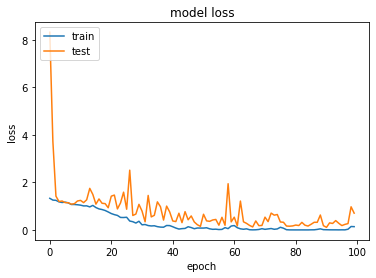

In [71]:
# Plotting the Train Valid Loss Graph

plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [104]:
import tensorflow as tf
from tensorflow.keras.initializers import glorot_uniform
loaded_model = tf.keras.models.load_model("TEO_MFCC/audio_classification.hdf5",custom_objects={'GlorotUniform': glorot_uniform()})
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, Y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 95.83%


In [106]:
Y_test

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0.

In [107]:
data_test = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(X_test))):
    data_test.loc[i] = [X_test[i]]
    

    
   
test_valid = pd.DataFrame(data_test['feature'].values.tolist())
test_valid = np.array(test_valid)
test_valid_lb = np.array(y_test)
lb = LabelEncoder()
test_valid_lb = np_utils.to_categorical(lb.fit_transform(test_valid_lb))
test_valid = np.expand_dims(test_valid, axis=2)


100%|███████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 911.20it/s]


In [108]:

np.set_printoptions(threshold=sys.maxsize)
len(test_valid[4])

360

In [109]:
preds = loaded_model.predict(test_valid, batch_size=16, verbose=1)

14/14 [==============================] - 1s 32ms/step


In [110]:
preds

array([[6.69987639e-06, 9.60396775e-08, 3.89996509e-04, 1.67583983e-06,
        9.99601543e-01],
       [9.94705617e-01, 3.95344617e-03, 1.30540703e-03, 5.50677100e-07,
        3.50125483e-05],
       [9.61930156e-01, 1.06897787e-03, 1.66696482e-04, 1.41674960e-07,
        3.68340947e-02],
       [2.52238315e-05, 1.43566058e-06, 2.34230865e-05, 3.81429140e-06,
        9.99946117e-01],
       [3.16041019e-06, 3.27816025e-07, 5.13271470e-06, 9.97798979e-01,
        2.19228840e-03],
       [6.99404240e-01, 3.01845535e-03, 2.85492122e-01, 8.84414294e-06,
        1.20763145e-02],
       [9.99472797e-01, 1.63919971e-08, 5.27079566e-04, 1.06033911e-08,
        8.52253947e-08],
       [1.51322524e-06, 9.84512091e-01, 5.93703862e-06, 8.49540299e-11,
        1.54805593e-02],
       [1.00000000e+00, 3.76238277e-11, 1.05018327e-09, 1.30383385e-10,
        1.15564620e-10],
       [2.86067848e-06, 4.66484169e-04, 9.89306033e-01, 1.00864843e-02,
        1.38132731e-04],
       [3.88527667e-07, 4.1255

In [111]:
preds1=preds.argmax(axis=1)

In [112]:
abc = preds1.astype(int).flatten()

In [113]:
predictions = (lb.inverse_transform((abc)))

In [114]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,male_sad
1,male_angry
2,male_angry
3,male_sad
4,male_neutral
5,male_angry
6,male_angry
7,male_disgust
8,male_angry
9,male_fearful


In [115]:
actual=test_valid_lb.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [116]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male_sad
1,male_angry
2,male_angry
3,male_sad
4,male_neutral
5,male_angry
6,male_angry
7,male_disgust
8,male_angry
9,male_fearful


In [117]:
finaldf = actualdf.join(preddf)
#abc1234 = finaldf.astype(float).flatten()
#finalvalues = (lb.inverse_transform((abc1234)))

In [126]:
finaldf

,actualvalues,predictedvalues
0,male_sad,male_sad
1,male_angry,male_angry
2,male_angry,male_angry
3,male_sad,male_sad
4,male_neutral,male_neutral
5,male_angry,male_angry
6,male_angry,male_angry
7,male_disgust,male_disgust
8,male_angry,male_angry
9,male_fearful,male_fearful


In [119]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
male_angry,48
male_disgust,48
male_fearful,48
male_neutral,24
male_sad,48


In [120]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
male_angry,47
male_disgust,45
male_fearful,44
male_neutral,27
male_sad,53


In [121]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [122]:
from sklearn.metrics import accuracy_score
y_true = finaldf.actualvalues
y_pred = finaldf.predictedvalues
accuracy_score(y_true, y_pred)*100

95.83333333333334

In [123]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro') *100

95.71213797439997

In [124]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_true, y_pred)

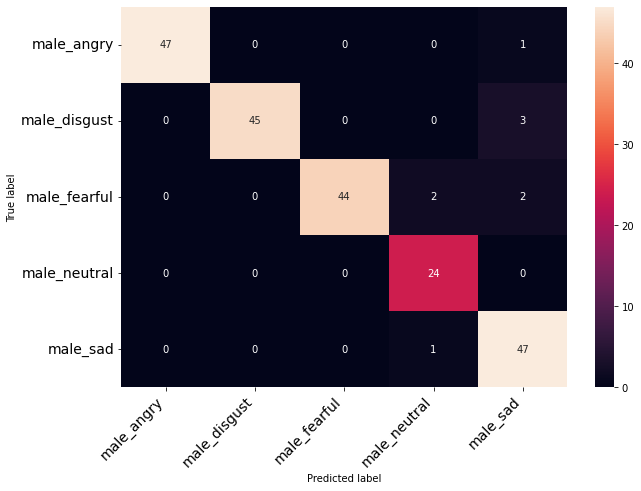

In [125]:
# Visualize Confusion Matrix 

class_names = ['male_angry', 'male_disgust', 'male_fearful', 'male_neutral', 'male_sad']

print_confusion_matrix(c, class_names)